## Carregando as Bibliotecas

In [1]:
import warnings    #Suprimir todos os warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

#Seed
seed=0
np.random.seed(seed)


 ## Carregar base de dados

In [2]:
df = pd.read_csv('artificialData.csv', header=None)
df.head()

,0,1
0,-0.28528,1.7837
1,-0.19421,1.2321
2,-0.97301,1.8227
3,-0.18662,1.2104
4,-0.46764,1.2175


In [3]:
df.shape

(800, 2)

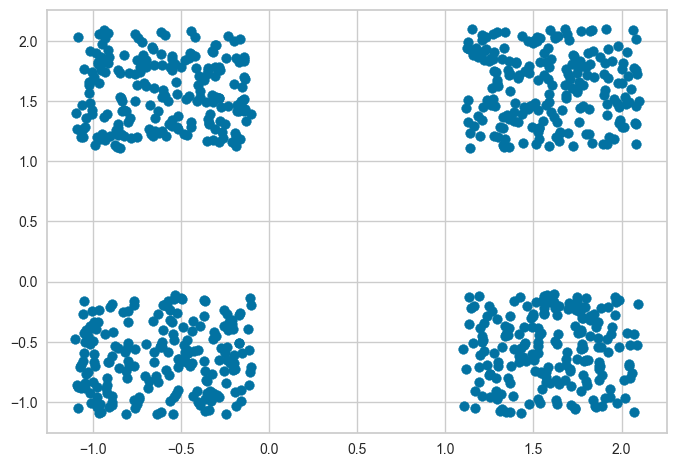

In [6]:
plt.scatter(x=df[0],y=df[1])

## Rodar Kmeans

In [4]:
kmeans=KMeans(n_clusters=3,random_state=seed)
kmeans=kmeans.fit(df)

In [5]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
df_clusters=df.copy()
df_clusters['cluster']=kmeans.labels_
df_clusters.tail()

,0,1,cluster
795,-1.04870,-0.59560,0
796,-1.02710,-0.75274,0
797,-1.01150,-1.00790,0
798,-0.30165,-0.95215,0
799,-0.15699,-0.90183,0


In [11]:
df_clusters.to_csv('agrupamento.csv',index=False)

## No. de Registro em cada Cluster

In [7]:
df_clusters.cluster.value_counts()

cluster
0    400
2    200
1    200
Name: count, dtype: int64

## Centroides

In [13]:
kmeans.cluster_centers_

array([[ 0.49176903, -0.5976143 ],
       [ 1.5913755 ,  1.618296  ],
       [-0.60227615,  1.571522  ]])

## Grafico da separcao dos gupos formados

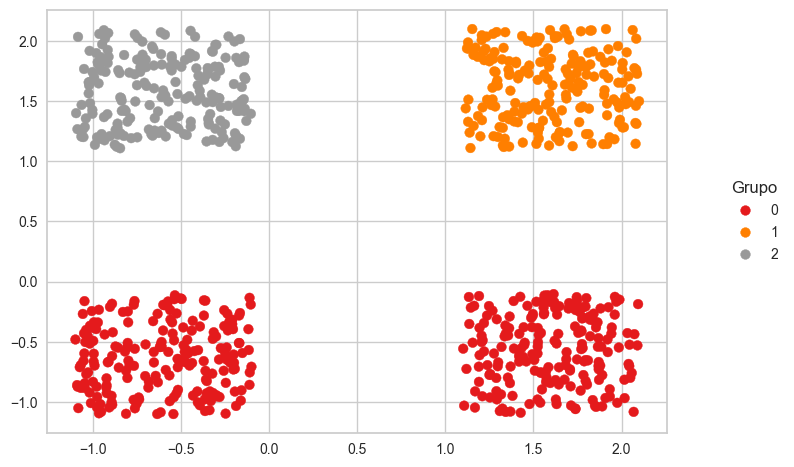

In [8]:
fig = plt.scatter(x=df[0],y=df[1],c=kmeans.labels_,cmap='Set1')
handles, labels=fig.legend_elements(prop='colors')
plt.legend(handles,labels,loc='center right', bbox_to_anchor=(1.2,0.5), title='Grupo')
plt.show()

## WCSS

- Métrica para avaliaão do m[etorodo do cotovelo. O ponto visto como um cotovelo indica o número ótimo de clusters

## Davies Bouldin

- Métrica para avaliar o número ótimo de clusters também. Mede a similaridade entre clusters e seu cluster mais próximo. A similaridade é dada pela razão entre a distância intra-cluster e a distância entre cluster. Portando clusters mais distantes e menos dispersos terão um score melhor. O valor mínimo é zero e quanto menor o score, melhor!

In [27]:
wcss=[]
davies_bouldin=[]
K = range(2,10) #último não entra
for k in K:
    kmeans = KMeans(n_clusters=k,random_state=seed)
    kmeans.fit(df)
    wcss.append([kmeans.inertia_,k])
    davies_bouldin.append(davies_bouldin_score(df, kmeans.labels_))
    inercia=[item[0] for item in wcss]
    valores_k=[item[1] for item in wcss]



## Método do Cotovelo (WCSS)

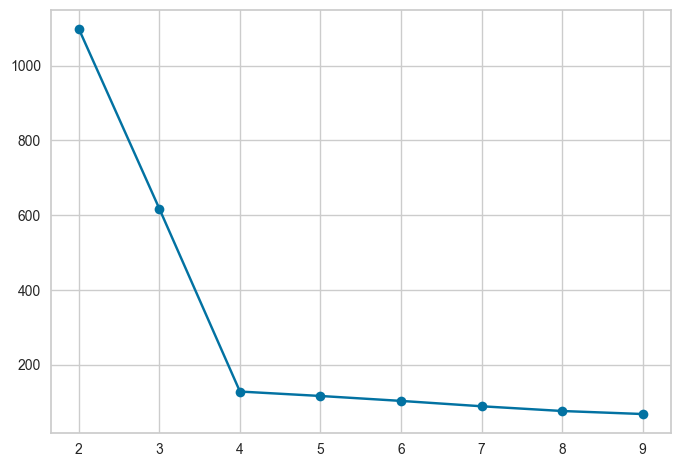

In [28]:
plt.plot(valores_k,inercia, marker='o')
plt.grid(True)

## Econtrar o ponto contovelo de forma automática

In [31]:
print('wcss>>',wcss)
diff1 = np.diff(inercia)
diff2=np.diff(diff1)
cotovelo = np.argmin(diff2)+2
print(diff1)
print(diff2)
print(cotovelo,wcss[cotovelo])


wcss>> [[1098.129468431181, 2], [616.699931568809, 3], [127.69673012674002, 4], [115.81445965884886, 5], [102.63711527017459, 6], [88.28628311909155, 7], [75.62231364883706, 8], [67.49901465170923, 9]]
[-481.42953686 -489.00320144  -11.88227047  -13.17734439  -14.35083215
  -12.66396947   -8.123299  ]
[ -7.57366458 477.12093097  -1.29507392  -1.17348776   1.68686268
   4.54067047]
2 [127.69673012674002, 4]


In [ ]:
k_otimo = wcss[cotovelo][1]  # Pega o valor de k correspondente
print(f"Cotovelo encontrado em k={k_otimo}")
print(wcss[4])

Cotovelo encontrado em k=4
